In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import similarity
import random
import meanCentered as mc
import helper.helper as hp

### PRE-PROCESSING

In [2]:
df = pd.read_csv('../DATA/TOY-DATA/toy.csv')
df

,User,1,2,3,4,5,6
0,1,5,0,4,3,5,4
1,2,4,5,0,3,2,3
2,3,0,3,0,2,1,0
3,4,1,2,2,0,3,4
4,5,1,0,1,2,3,3


In [3]:
df_without_user_column = df.drop(columns=["User"])

In [4]:
matrix = np.array(df_without_user_column).tolist()
matrix

[[5, 0, 4, 3, 5, 4],
 [4, 5, 0, 3, 2, 3],
 [0, 3, 0, 2, 1, 0],
 [1, 2, 2, 0, 3, 4],
 [1, 0, 1, 2, 3, 3]]

In [5]:
meanC = mc.MeanCentered(matrix,opsional=0)

In [6]:
meanC.getMeanListDataFrame()

,0
0,4.2
1,3.4
2,2.0
3,2.4
4,2.0


In [7]:
meanC.getMeanCenteredDataFrame()

,0,1,2,3,4,5
0,0.8,0.0,-0.2,-1.2,0.8,-0.2
1,0.6,1.6,0.0,-0.4,-1.4,-0.4
2,0.0,1.0,0.0,0.0,-1.0,0.0
3,-1.4,-0.4,-0.4,0.0,0.6,1.6
4,-1.0,0.0,-1.0,0.0,1.0,1.0


### PEARSON SIMILARITY MEASURE

In [8]:
similarity_pearson = similarity.Pearson(matrix,opsional="item-based",k=2)

Item : 0 dan 1
MC Before [2.25, 1.25, 0, -1.75, -1.75]
Index 0 : [0, 2, 4]
MC After : [ 1.25 -1.75]
Item : 0 dan 2
MC Before [2.25, 1.25, 0, -1.75, -1.75]
Index 0 : [1, 2]
MC After : [ 2.25 -1.75 -1.75]
Item : 0 dan 3
MC Before [2.25, 1.25, 0, -1.75, -1.75]
Index 0 : [2, 3]
MC After : [ 2.25  1.25 -1.75]
Item : 0 dan 4
MC Before [2.25, 1.25, 0, -1.75, -1.75]
Index 0 : [2]
MC After : [ 2.25  1.25 -1.75 -1.75]
Item : 0 dan 5
MC Before [2.25, 1.25, 0, -1.75, -1.75]
Index 0 : [2]
MC After : [ 2.25  1.25 -1.75 -1.75]
Item : 1 dan 2
MC Before [0, 1.6666666666666665, -0.3333333333333335, -1.3333333333333335, 0]
Index 0 : [0, 1, 2, 4]
MC After : [-1.33333333]
Item : 1 dan 3
MC Before [0, 1.6666666666666665, -0.3333333333333335, -1.3333333333333335, 0]
Index 0 : [0, 3, 4]
MC After : [ 1.66666667 -0.33333333]
Item : 1 dan 4
MC Before [0, 1.6666666666666665, -0.3333333333333335, -1.3333333333333335, 0]
Index 0 : [0, 4]
MC After : [ 1.66666667 -0.33333333 -1.33333333]
Item : 1 dan 5
MC Before [0, 

In [9]:
similarity_pearson.getMeanListDataFrame()

,0
0,2.750000
1,3.333333
2,2.333333
3,2.500000
4,2.800000
5,3.500000


In [41]:
class A() :
    def __init__(self) -> None:
        print("start")
    
    def __del__(self) -> None:
        print("end")

start
end


AttributeError: __enter__

In [10]:
similarity_pearson.getMeanListArray()

[2.75, 3.3333333333333335, 2.3333333333333335, 2.5, 2.8, 3.5]

In [11]:
similarity_pearson.getMeanCenteredDataFrame()

,0,1,2,3,4
0,2.250000,1.250000,0.000000,-1.750000,-1.750000
1,0.000000,1.666667,-0.333333,-1.333333,0.000000
2,1.666667,0.000000,0.000000,-0.333333,-1.333333
3,0.500000,0.500000,-0.500000,0.000000,-0.500000
4,2.200000,-0.800000,-1.800000,0.200000,0.200000
5,0.500000,-0.500000,0.000000,0.500000,-0.500000


In [12]:
similarity_pearson.getSimilarityDataFrame()

,0,1,2,3,4,5
0,1.000000+0.000000j,0.962206+0.000000j,0.922654+0.000000j,0.973852+0.000000j,0.386003+0.000000j,0.140028+0.000000j
1,0.962206+0.000000j,1.000000+0.000000j,1.000000+0.000000j,0.832050+0.000000j,-0.233805+0.000000j,-0.993884+0.000000j
2,0.922654+0.000000j,1.000000+0.000000j,1.000000+0.000000j,0.993884+0.000000j,0.695653+0.000000j,0.712697+0.000000j
3,0.973852+0.000000j,0.832050+0.000000j,0.993884+0.000000j,1.000000+0.000000j,0.506803+0.000000j,0.333333+0.000000j
4,0.386003+0.000000j,-0.233805+0.000000j,0.695653+0.000000j,0.506803+0.000000j,1.000000+0.000000j,0.636142+0.000000j
5,0.140028+0.000000j,-0.993884+0.000000j,0.712697+0.000000j,0.333333+0.000000j,0.636142+0.000000j,1.000000+0.000000j


In [13]:
similarity_pearson.getPredictionDataFrame()

,0,1,2,3,4,5
0,5.000000,5.286049,4.000000,3.000000,5,4.000000
1,4.000000,5.000000,3.418456,3.000000,2,3.000000
2,2.332832,3.000000,1.916922,2.000000,1,2.146977
3,1.000000,2.000000,2.000000,1.465544,3,4.000000
4,1.000000,1.795679,1.000000,2.000000,3,3.000000


In [14]:
similarity_pearson.getPredictionDataFrame()

,0,1,2,3,4,5
0,5.000000,5.286049,4.000000,3.000000,5,4.000000
1,4.000000,5.000000,3.418456,3.000000,2,3.000000
2,2.332832,3.000000,1.916922,2.000000,1,2.146977
3,1.000000,2.000000,2.000000,1.465544,3,4.000000
4,1.000000,1.795679,1.000000,2.000000,3,3.000000


### COSINE SIMILARITY MEASURE

In [15]:
similarity_cosine = similarity.Cosine(matrix,opsional="user-based",k=2)

Index Terurut berdasarkan similaritas : [4, 3]
Neighborhood sorted : [0.8987170342729173, 0.7910292118262815] mean centered : [0.0, -0.3999999999999999]
Rata-rata : 4.2
Nume : -0.3164116847305125
denom : 1.6897462460991988
4.2 + (-0.3164116847305125/1.6897462460991988) result : 4.012746034819753
Index Terurut berdasarkan similaritas : [3, 0]
Neighborhood sorted : [0.6914173051223086, 0.6735645239877782] mean centered : [-0.3999999999999999, -0.20000000000000018]
Rata-rata : 3.4
Nume : -0.4112798268464791
denom : 1.3649818291100868
3.4 + (-0.4112798268464791/1.3649818291100868) result : 3.0986920865352348
Index Terurut berdasarkan similaritas : [1, 3]
Neighborhood sorted : [0.7744502841566948, 0.412514323662695] mean centered : [0.6000000000000001, -1.4]
Rata-rata : 2.0
Nume : -0.11284988263375606
denom : 1.1869646078193898
2.0 + (-0.11284988263375606/1.1869646078193898) result : 1.90492565499398
Index Terurut berdasarkan similaritas : [1, 3]
Neighborhood sorted : [0.7744502841566948, 0

In [16]:
similarity_cosine.getMeanListDataFrame()

,0
0,4.2
1,3.4
2,2.0
3,2.4
4,2.0


In [17]:
similarity_cosine.getMeanCenteredDataFrame()

,0,1,2,3,4,5
0,0.8,0.0,-0.2,-1.2,0.8,-0.2
1,0.6,1.6,0.0,-0.4,-1.4,-0.4
2,0.0,1.0,0.0,0.0,-1.0,0.0
3,-1.4,-0.4,-0.4,0.0,0.6,1.6
4,-1.0,0.0,-1.0,0.0,1.0,1.0


In [18]:
similarity_cosine.getSimilarityDataFrame()

,0,1,2,3,4
0,1.000000+0.000000j,0.673565+0.000000j,0.308182+0.000000j,0.791029+0.000000j,0.898717+0.000000j
1,0.673565+0.000000j,1.000000+0.000000j,0.774450+0.000000j,0.691417+0.000000j,0.642931+0.000000j
2,0.308182+0.000000j,0.774450+0.000000j,1.000000+0.000000j,0.412514+0.000000j,0.381881+0.000000j
3,0.791029+0.000000j,0.691417+0.000000j,0.412514+0.000000j,1.000000+0.000000j,0.840168+0.000000j
4,0.898717+0.000000j,0.642931+0.000000j,0.381881+0.000000j,0.840168+0.000000j,1.000000+0.000000j


In [19]:
similarity_cosine.getPredictionDataFrame()

,0,1,2,3,4,5
0,5.000000,4.012746,4.000000,3.000000,5,4.000000
1,4.000000,5.000000,3.098692,3.000000,2,3.000000
2,1.904926,3.000000,1.860985,2.000000,1,2.295074
3,1.000000,2.000000,2.000000,1.818075,3,4.000000
4,1.000000,1.806734,1.000000,2.000000,3,3.000000


### ADJUSTED COSINE SIMILARITY MEASURE

In [20]:
similarity_a_cosine = similarity.ACosine(matrix,opsional="user-based",k=2)

Index Terurut berdasarkan similaritas : [3, 4]
Neighborhood sorted : [-0.5682823663314001, -0.7385949915952659] mean centered : [-0.3999999999999999, 0.0]
Rata-rata : 4.2
Nume : 0.22731294653255998
denom : 1.306877357926666
4.2 + (0.22731294653255998/1.306877357926666) result : 4.373935943685785
Index Terurut berdasarkan similaritas : [0, 4]
Neighborhood sorted : [0.19850451577276546, -0.7523514371148738] mean centered : [-0.20000000000000018, -1.0]
Rata-rata : 3.4
Nume : 0.7126505339603207
denom : 0.9508559528876392
3.4 + (0.7126505339603207/0.9508559528876392) result : 4.149483170185856
Index Terurut berdasarkan similaritas : [1, 3]
Neighborhood sorted : [0.17457169574701567, 0.03421419088362375] mean centered : [0.6000000000000001, -1.4]
Rata-rata : 2.0
Nume : 0.05684315021113617
denom : 0.2087858866306394
2.0 + (0.05684315021113617/0.2087858866306394) result : 2.272255711956703
Index Terurut berdasarkan similaritas : [1, 3]
Neighborhood sorted : [0.17457169574701567, 0.034214190883

In [21]:
similarity_a_cosine.getMeanCenteredDataFrame()

,0,1,2,3,4
0,2.250000,1.250000,0.000000,-1.750000,-1.750000
1,0.000000,1.666667,-0.333333,-1.333333,0.000000
2,1.666667,0.000000,0.000000,-0.333333,-1.333333
3,0.500000,0.500000,-0.500000,0.000000,-0.500000
4,2.200000,-0.800000,-1.800000,0.200000,0.200000
5,0.500000,-0.500000,0.000000,0.500000,-0.500000


In [22]:
similarity_a_cosine.getMeanListDataFrame()

,0
0,2.750000
1,3.333333
2,2.333333
3,2.500000
4,2.800000
5,3.500000


In [23]:
similarity_a_cosine.getSimilarityDataFrame()

,0,1,2,3,4
0,1.000000,0.198505,-0.998873,-0.568282,-0.738595
1,0.198505,1.000000,0.174572,-0.930442,-0.752351
2,-0.998873,0.174572,1.000000,0.034214,-0.109340
3,-0.568282,-0.930442,0.034214,1.000000,0.782126
4,-0.738595,-0.752351,-0.109340,0.782126,1.000000


In [24]:
similarity_a_cosine.getPredictionDataFrame()

,0,1,2,3,4,5
0,5.000000,4.373936,4.000000,3.0,5,4.000000
1,4.000000,5.000000,4.149483,3.0,2,3.000000
2,2.272256,3.000000,1.934451,2.0,1,1.927744
3,1.000000,2.000000,2.000000,2.4,3,4.000000
4,1.000000,1.526409,1.000000,2.0,3,3.000000


## BC SIMILARITY MEASRURE

In [25]:
bc = similarity.BC(matrix,opsional="item-based",k=2)

Index Terurut berdasarkan similaritas : [4, 3]
Neighborhood sorted : [0.8815461511644329, 0.816496580927726] mean centered : [2.2, 0.5]
Rata-rata : 3.3333333333333335
Nume : 2.3476498230256158
denom : 1.698042732092159
3.3333333333333335 + (2.3476498230256158/1.698042732092159) result : 4.715895608508279
Index Terurut berdasarkan similaritas : [0, 4]
Neighborhood sorted : [0.6969234250586759, 0.5163977794943222] mean centered : [1.25, -0.7999999999999998]
Rata-rata : 2.3333333333333335
Nume : 0.45803605772788714
denom : 1.2133212045529982
2.3333333333333335 + (0.45803605772788714/1.2133212045529982) result : 2.71083935235707
Index Terurut berdasarkan similaritas : [4, 1]
Neighborhood sorted : [0.5398345637668169, 0.28867513459481287] mean centered : [-1.7999999999999998, -0.3333333333333335]
Rata-rata : 2.75
Nume : -1.067927259645208
denom : 0.8285096983616298
2.75 + (-1.067927259645208/0.8285096983616298) result : 1.461026241748257
Index Terurut berdasarkan similaritas : [4, 3]
Neighb

In [26]:
bc.getSimilarityDataFrame()

,0,1,2,3,4,5
0,1.000000,0.288675,0.696923,0.000000,0.539835,0.353553
1,0.288675,1.000000,0.333333,0.816497,0.881546,0.408248
2,0.696923,0.333333,1.000000,0.408248,0.516398,0.408248
3,0.000000,0.816497,0.408248,1.000000,0.763441,0.500000
4,0.539835,0.881546,0.516398,0.763441,1.000000,0.447214
5,0.353553,0.408248,0.408248,0.500000,0.447214,1.000000


In [27]:
bc.getPredictionDataFrame()

,0,1,2,3,4,5
0,5.000000,4.715896,4.000000,3.000000,5,4.000000
1,4.000000,5.000000,2.710839,3.000000,2,3.000000
2,1.461026,3.000000,1.107307,2.000000,1,2.386223
3,1.000000,2.000000,2.000000,1.907588,3,4.000000
4,1.000000,3.196741,1.000000,2.000000,3,3.000000


In [28]:
bc.getTopNDataFrame()

,0,1
0,4.715896,NaN
1,2.710839,NaN
2,2.386223,1.461026
3,1.907588,NaN
4,3.196741,NaN


In [29]:
bc.getTopNArray()

[[4.715895608508279],
 [2.71083935235707],
 [2.3862232585005465, 1.461026241748257],
 [1.907588228337556],
 [3.196741328993605]]

In [30]:
array = similarity_a_cosine.getSimilarityArray() 

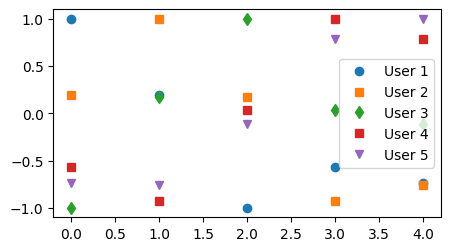

In [31]:
fig, ax = plt.subplots(figsize=(5, 2.7))
shape_draft = ["o","d","v","s"]

shape = [random.choice(shape_draft) for i in range(len(array))]
for i in range(len(array)) :
    ax.plot(array[i], shape[i], label=f'User {i+1}')
ax.legend()

In [32]:
import random

def makeMatrix(m,n) -> list :
    return [[None for j in range(n)]for i in range(m)]

def calculateNumberOfDataSparsity(data:list , sparsityPercent : int) -> list :
    m = len(data)
    n = len(data[0])
    width = n*m
    numberOfSparsity = width*sparsityPercent
    
    for i in range(m) :
        listIndex = [random.randint() for i in range(random.randint(1,m-1))]

def fillMatrix(min:int,max: int,data : list[int] , sparsity : int) -> list :
    result = data
    for dataInner in data:
        for j in range(len(dataInner[0])):
            data[j] = random.randint(min,max)
    return result


In [33]:
a = [[1,2,3,4,1,0]]
print(len(a[0])- a[0].count(0))
print(sum(a[0]))
# print(b.sum())
# print(b[0])
# print(type(int(b[0]+3)))

5
11


In [34]:
pd.DataFrame([
    [
        1,
        0.9553175278133278,
        0.8436614877321075,
        0.887125622400063,
        0.8987170342729172
    ],
    [
        0.9553175278133278,
        1,
        0.997176464952738,
        0.7950463919999252,
        0.8456376143646731
    ],
    [
        0.8436614877321075,
        0.997176464952738,
        1,
        0.7893522173763263,
        0.8682431421244593
    ],
    [
        0.887125622400063,
        0.7950463919999252,
        0.7893522173763263,
        1,
        0.9797958971132711
    ],
    [
        0.8987170342729172,
        0.8456376143646731,
        0.8682431421244593,
        0.9797958971132711,
        1
    ]
])

,0,1,2,3,4
0,1.000000,0.955318,0.843661,0.887126,0.898717
1,0.955318,1.000000,0.997176,0.795046,0.845638
2,0.843661,0.997176,1.000000,0.789352,0.868243
3,0.887126,0.795046,0.789352,1.000000,0.979796
4,0.898717,0.845638,0.868243,0.979796,1.000000


In [35]:
data = [
    [1,0,0,4,7,8],
    [1,0,0,9,3,0],
    [1,0,0,8,0,6],
]

prediction = [
    [1,7.7,3,4,2,9],
    [1,2,8.8,9,6,9],
    [1,9.9,3,8,3,6],
]
result = []
for i in range(len(data)) :
    # print(data[i])
    # print(prediction[i])
    result.append(sorted([prediction[i][inner] for inner in range(len(data[i])) if data[i][inner] == 0],reverse=True)[0:2])

print(result)

[[7.7, 3], [9, 8.8], [9.9, 3]]
